In [1]:
import sys
sys.path.append('../../code/')
import os
import json
from datetime import datetime
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

#import networkx as nx

#from load_data import load_citation_network, case_info

import operator

%load_ext autoreload
%autoreload 2
%matplotlib inline

data_dir = '../../data/'
court_name = 'scotus'

### Modify 'load_citation_network(data_dir, court_name)' to make igraph work

In [2]:
from pipeline.make_clean_data import make_court_subnetwork
from igraph import *

def load_citation_network(data_dir, court_name):
    """
    Loads the citation subnetwork into networkx

    Parameters
    ----------
    data_dir: path to data directory

    court_name: which subnetwork i.e. fisc, scotus, etc
    'entire' gets the entire network

    metadata: which metadata to load

    directed: are the edges directed
    """
    jurisdictions = pd.read_csv(data_dir + 'clean/jurisdictions.csv',
                                index_col='abbrev')

    all_courts = set(jurisdictions.index)
    if not((court_name in all_courts) or (court_name == 'all')):
        raise ValueError('invalid court_name')

    if court_name == 'all':
        case_meatadata = pd.read_csv(data_dir + '/case_metadata_master.csv',
                                     index_col='id')

        edgelist = pd.read_csv(data_dir + 'clean/edgelist_master.csv')
    else:
        net_dir = data_dir + 'clean/' + court_name + '/'
        if not os.path.exists(net_dir):
            os.makedirs(net_dir)
            make_court_subnetwork(court_name, data_dir)

        case_metadata = pd.read_csv(net_dir + 'case_metadata.csv',
                                    index_col='id')

        edgelist = pd.read_csv(net_dir + 'edgelist.csv')
    '''
    # create graph and add metadata
    G = nx.DiGraph()
    G.add_nodes_from(case_metadata.index.tolist())
    nx.set_node_attributes(G, 'date', case_metadata['date'].to_dict())
    for index, edge in edgelist.iterrows():
        ing = edge['citing']
        ed = edge['cited']
        G.add_edge(ing, ed)

    return G
    '''
    # create graph and add metadata (igraph)
    G = Graph(directed=True)
    G.add_vertices(case_metadata.index.tolist())
    G.vs['date'] = case_metadata['date'].tolist()
    
    edgelist_igraph = []
    for index, edge in edgelist.iterrows():
        ing = edge['citing']
        ed = edge['cited']
        some_edge = (ing,ed)
        edgelist_igraph.append(some_edge)
    
    G.add_edges(edgelist_igraph)
    
    return G

### Edges Won't load :(

In [3]:
G = load_citation_network(data_dir, court_name)

print 'loaded %s network with %d cases and %d edges' % (court_name, G.vcount(), G.ecount())

InternalError: Error at .\src\type_indexededgelist.c:272: cannot add edges, Invalid vertex id

### Everything Below is Random Shit (NOT IMPORTANT)

In [76]:
net_dir = data_dir + 'clean/' + court_name + '/'

case_metadata = pd.read_csv(net_dir + 'case_metadata.csv', index_col='id')
edgelist = pd.read_csv(net_dir + 'edgelist.csv')

pee = case_metadata.index.tolist()[0]
print pee
#poop = case_metadata['date'].to_dict()
#print poop
pee2 = edgelist['citing'].tolist()[0]
print pee2
print type(pee)
print type(pee2)

poop = case_metadata['date'].tolist()

100000
3181043
<type 'numpy.int64'>
<type 'numpy.int64'>


In [64]:
date_dict = case_metadata['date'].to_dict()
date_dict[case_metadata.index.tolist()[0]]
date_list = [date_dict[node] for node in case_metadata.index.tolist()]
#print date_list

poop == date_list

True

[0, 1, 1]
[1, 1, 0]
3
2
[1980, 1981, 1982]
igraph.Vertex(<igraph.Graph object at 0x000000000B58A048>,0,{'name': 0, 'year': 1980})


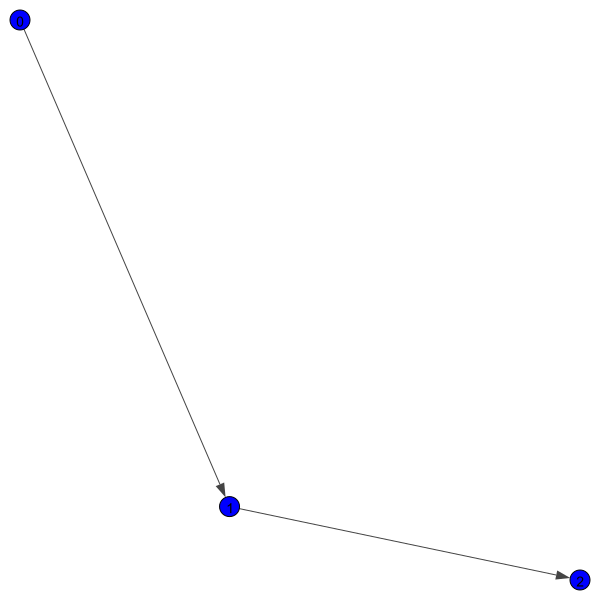

In [43]:
G = Graph(directed=True)
G.add_vertices([0,1,2])

#G.vs['label']=G.vs['name']
G.vs['year']=[1980,1981,1982]
G.add_edges([(0,1),(1,2)])
print G.indegree()
print G.outdegree()
print G.vcount()
print G.ecount()
#print G.vs['label']
print G.vs['year']
print G.vs[0]
plot(G, vertex_label=G.vs['name'], vertex_color='Blue')

#set_vertex_attr(graph, name, index = V(graph), value)